In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_bo = pd.read_csv('DOHMH_COVID-19_Antibody-by-Borough_20240606.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')
covid_case =pd.read_csv('DOHMH_Covid-19_Milestone_Data__New_Cases_of_Covid-19__7_Day_Average__20240606.csv')


In [3]:
covid_out.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582


In [4]:
covid_out= covid_out.drop('extract_date', axis=1)
print(covid_out.head())


  specimen_date  Number_tested  Number_confirmed  Number_hospitalized  \
0    04/17/2020           9979              3386                  527   
1    02/08/2020              1                 0                    0   
2    03/05/2020             63                 5                    3   
3    04/09/2020           9019              4803                 1253   
4    04/03/2020           9389              5523                 1688   

   Number_deaths  
0             96  
1              0  
2              1  
3            386  
4            582  


In [5]:
covid_out.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/17/2020,9979,3386,527,96
1,02/08/2020,1,0,0,0
2,03/05/2020,63,5,3,1
3,04/09/2020,9019,4803,1253,386
4,04/03/2020,9389,5523,1688,582


In [6]:
print(covid_out.info)
print(covid_out.shape)
print(covid_out.head)
print(covid_out.isnull().sum())

<bound method DataFrame.info of        specimen_date  Number_tested  Number_confirmed  Number_hospitalized  \
0         04/17/2020           9979              3386                  527   
1         02/08/2020              1                 0                    0   
2         03/05/2020             63                 5                    3   
3         04/09/2020           9019              4803                 1253   
4         04/03/2020           9389              5523                 1688   
...              ...            ...               ...                  ...   
176143    11/18/2020          21551              2483                  163   
176144    03/17/2021          13961              1678                  166   
176145    03/09/2020            401                89                   36   
176146    09/10/2021          14573               503                   38   
176147    09/04/2020          18765              1648                  147   

        Number_deaths  
0      

In [7]:
covid_out.dtypes

specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
Number_deaths           int64
dtype: object

In [8]:
covid_out['specimen_date']=covid_out['specimen_date'].astype('str')

In [9]:

covid_out['specimen_date']=pd.to_datetime(covid_out['specimen_date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2299-07-21 00:00:00 present at position 277

In [10]:
covid_out['specimen_date']=pd.to_datetime(covid_out['specimen_date'], errors= 'coerce')

In [11]:
covid_out= covid_out.rename(columns={'specimen_date':'Sample Date'})

In [12]:
covid_out= covid_out.rename(columns={'Concentration SARS-CoV-2 gene target (N1 Copies/L)':'Concentration'})

In [13]:
covid_out.head()

,Sample Date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582


In [14]:
covid_out.isnull().sum()

Sample Date            169
Number_tested            0
Number_confirmed         0
Number_hospitalized      0
Number_deaths            0
dtype: int64

In [15]:
covid_out.dtypes

Sample Date            datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object

In [16]:
len(covid_out.index)

176148

In [17]:
covid_out= covid_out.dropna()

In [18]:
covid_out.isnull().sum()

Sample Date            0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64

In [19]:
len(covid_out.index)

175979

In [20]:
covid_out.sort_values(by= 'Sample Date')

,Sample Date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
39469,2020-01-01,1,1,0,0
37843,2020-01-01,1,1,0,0
35476,2020-01-01,1,1,0,0
49187,2020-01-01,2,2,0,1
44355,2020-01-01,1,1,0,0
...,...,...,...,...,...
175092,2021-09-27,5271,101,2,0
175566,2021-09-27,5271,101,11,0
174464,2021-09-28,123,3,0,0
175640,2021-09-28,123,3,1,0


In [21]:
print(covid_out['Sample Date'].max())
print(covid_out['Sample Date'].min())

2021-09-28 00:00:00
2020-01-01 00:00:00


In [22]:
covid_bo.head()

,demo_variable,NUM_PEOP_TEST,NUM_PEOP_POS,PERCENT_POSITIVE,TEST_RATE
0,BoroA_Bronx,441253,160926,0.365,31113.441
1,BoroB_Brooklyn,959956,342399,0.357,37499.702
2,BoroC_Manhattan,634633,169300,0.267,38965.473
3,BoroD_Queens,904965,328099,0.363,40151.820
4,BoroE_Staten_Island,164922,52555,0.319,34637.073


In [23]:
print(covid_bo.info)
print(covid_bo.shape)
print(covid_bo.head)
print(covid_bo.isnull().sum())

<bound method DataFrame.info of          demo_variable  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  \
0          BoroA_Bronx         441253        160926             0.365   
1       BoroB_Brooklyn         959956        342399             0.357   
2      BoroC_Manhattan         634633        169300             0.267   
3         BoroD_Queens         904965        328099             0.363   
4  BoroE_Staten_Island         164922         52555             0.319   

   TEST_RATE  
0  31113.441  
1  37499.702  
2  38965.473  
3  40151.820  
4  34637.073  >
(5, 5)
<bound method NDFrame.head of          demo_variable  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  \
0          BoroA_Bronx         441253        160926             0.365   
1       BoroB_Brooklyn         959956        342399             0.357   
2      BoroC_Manhattan         634633        169300             0.267   
3         BoroD_Queens         904965        328099             0.363   
4  BoroE_Staten_Island         16492

In [24]:
covid_bo.dtypes

demo_variable        object
NUM_PEOP_TEST         int64
NUM_PEOP_POS          int64
PERCENT_POSITIVE    float64
TEST_RATE           float64
dtype: object

In [25]:
covid_waste.head()

,Sample Date,Test date,WRRF Name,WRRF Abbreviation,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),Annotation,"Population Served, estimated",Technology
0,08/31/2020,09/01/2020,26th Ward,26W,389.0,264000.0,Concentration below Method Limit of Quantifica...,318262,RT-qPCR - N1
1,08/31/2020,09/01/2020,Bowery Bay,BB,1204.0,444000.0,NaN,894311,RT-qPCR - N1
2,08/31/2020,09/01/2020,Coney Island,CI,304.0,169000.0,Concentration below Method Limit of Quantifica...,647635,RT-qPCR - N1
3,08/31/2020,09/01/2020,Hunts Point,HP,940.0,574000.0,NaN,781885,RT-qPCR - N1
4,08/31/2020,09/01/2020,Jamaica Bay,JA,632.0,233000.0,NaN,735054,RT-qPCR - N1


In [26]:
covid_waste=covid_waste.drop('Annotation', axis=1)


In [27]:
covid_waste=covid_waste.drop('Technology', axis=1)

In [28]:
covid_waste=covid_waste.drop('WRRF Abbreviation', axis=1)

In [29]:
covid_waste=covid_waste.drop('Test date', axis=1)

In [30]:
print(covid_waste.info)
print(covid_waste.shape)
print(covid_waste.head)
print(covid_waste.isnull().sum())

<bound method DataFrame.info of      Sample Date       WRRF Name  \
0     08/31/2020       26th Ward   
1     08/31/2020      Bowery Bay   
2     08/31/2020    Coney Island   
3     08/31/2020     Hunts Point   
4     08/31/2020     Jamaica Bay   
...          ...             ...   
5287  05/14/2024   Port Richmond   
5288  05/14/2024        Red Hook   
5289  05/14/2024        Rockaway   
5290  05/14/2024  Tallman Island   
5291  05/14/2024    Wards Island   

      Concentration SARS-CoV-2 gene target (N1 Copies/L)   \
0                                                389.00     
1                                               1204.00     
2                                                304.00     
3                                                940.00     
4                                                632.00     
...                                                 ...     
5287                                           36011.43     
5288                                           

In [31]:
covid_waste=covid_waste.fillna(0)

In [32]:

print(covid_waste.isnull().sum())

Sample Date                                                      0
WRRF Name                                                        0
Concentration SARS-CoV-2 gene target (N1 Copies/L)               0
Per capita SARS-CoV-2 load (N1 copies per day per population)    0
Population Served, estimated                                     0
dtype: int64


In [33]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,08/31/2020,26th Ward,389.0,264000.0,318262
1,08/31/2020,Bowery Bay,1204.0,444000.0,894311
2,08/31/2020,Coney Island,304.0,169000.0,647635
3,08/31/2020,Hunts Point,940.0,574000.0,781885
4,08/31/2020,Jamaica Bay,632.0,233000.0,735054


In [34]:

covid_waste['Sample Date']=pd.to_datetime(covid_waste['Sample Date'])

In [35]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,2020-08-31,26th Ward,389.0,264000.0,318262
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311
2,2020-08-31,Coney Island,304.0,169000.0,647635
3,2020-08-31,Hunts Point,940.0,574000.0,781885
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054


In [36]:
covid_waste.dtypes

Sample Date                                                      datetime64[ns]
WRRF Name                                                                object
Concentration SARS-CoV-2 gene target (N1 Copies/L)                      float64
Per capita SARS-CoV-2 load (N1 copies per day per population)           float64
Population Served, estimated                                              int64
dtype: object

In [37]:
covid_waste.sort_values(by='Sample Date')

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,2020-08-31,26th Ward,389.00,264000.0,318262
13,2020-08-31,Wards Island,1339.00,781000.0,1173448
12,2020-08-31,Tallman Island,571.00,250000.0,457817
11,2020-08-31,Rockaway,371.00,210000.0,117991
9,2020-08-31,Port Richmond,0.00,0.0,224516
...,...,...,...,...,...
5280,2024-05-14,Coney Island,3657.14,1770000.0,647635
5279,2024-05-14,Bowery Bay,23382.86,10400000.0,894311
5278,2024-05-14,26th Ward,21965.71,11000000.0,318262
5283,2024-05-14,Newtown Creek,31017.14,19100000.0,1227810


In [38]:
covid_waste['Sample Date']=pd.to_datetime(covid_waste['Sample Date'])

In [39]:
covid_waste.index

RangeIndex(start=0, stop=5292, step=1)

In [40]:
print(covid_waste['Sample Date'].max())
print(covid_waste['Sample Date'].min())

2024-05-14 00:00:00
2020-08-31 00:00:00


In [42]:
covid_case.head()

,date,Confirmed_Cases,Probable_Cases,Total_Cases,7-day_Average_of_Confirmed_Cases,7-day_Average_of_Probable_Cases,7-day_Average of_Total_cases,status,ETLdate
0,10/01/2020 12:00:00 AM +0000,614,82,696.0,NaN,NaN,NaN,Update,03/30/2021 03:23:10 PM +0000
1,10/10/2020 12:00:00 AM +0000,310,46,356.0,NaN,NaN,NaN,Update,03/30/2021 03:23:18 PM +0000
2,10/11/2020 12:00:00 AM +0000,281,50,331.0,NaN,NaN,NaN,Update,03/30/2021 03:23:17 PM +0000
3,10/12/2020 12:00:00 AM +0000,514,73,587.0,NaN,NaN,NaN,Update,03/30/2021 03:23:18 PM +0000
4,10/13/2020 12:00:00 AM +0000,588,114,702.0,NaN,NaN,NaN,Update,03/30/2021 03:23:19 PM +0000


In [43]:
print(covid_case.info)
print(covid_case.shape)
print(covid_case.head)
print(covid_case.isnull().sum())

<bound method DataFrame.info of                              date  Confirmed_Cases  Probable_Cases  \
0    10/01/2020 12:00:00 AM +0000              614              82   
1    10/10/2020 12:00:00 AM +0000              310              46   
2    10/11/2020 12:00:00 AM +0000              281              50   
3    10/12/2020 12:00:00 AM +0000              514              73   
4    10/13/2020 12:00:00 AM +0000              588             114   
..                            ...              ...             ...   
272  06/03/2021 12:00:00 AM +0000              194              45   
273  06/06/2021 12:00:00 AM +0000              122              34   
274  06/08/2021 12:00:00 AM +0000              165              55   
275  05/01/2021 12:00:00 AM +0000              557             222   
276  05/04/2021 12:00:00 AM +0000              854             235   

     Total_Cases  7-day_Average_of_Confirmed_Cases  \
0          696.0                               NaN   
1          356.0   

In [44]:
covid_case.dtypes

date                                 object
Confirmed_Cases                       int64
Probable_Cases                        int64
Total_Cases                         float64
7-day_Average_of_Confirmed_Cases    float64
7-day_Average_of_Probable_Cases     float64
7-day_Average of_Total_cases        float64
status                               object
ETLdate                              object
dtype: object

In [45]:
covid_case=covid_case.drop('7-day_Average_of_Confirmed_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average_of_Probable_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average of_Total_cases', axis=1)
covid_case=covid_case.drop('status', axis=1)

In [46]:
covid_case.head()

,date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,10/01/2020 12:00:00 AM +0000,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,10/10/2020 12:00:00 AM +0000,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,10/11/2020 12:00:00 AM +0000,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,10/12/2020 12:00:00 AM +0000,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,10/13/2020 12:00:00 AM +0000,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [47]:

covid_case['date']=pd.to_datetime(covid_case['date'])

In [48]:
covid_case= covid_case.rename(columns={'date':'Sample Date'})

In [49]:
covid_case.head()

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-10-01 00:00:00+00:00,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,2020-10-10 00:00:00+00:00,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,2020-10-11 00:00:00+00:00,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,2020-10-12 00:00:00+00:00,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,2020-10-13 00:00:00+00:00,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [50]:
covid_case.dtypes

Sample Date        datetime64[ns, UTC]
Confirmed_Cases                  int64
Probable_Cases                   int64
Total_Cases                    float64
ETLdate                         object
dtype: object

In [51]:
covid_case['Sample Date']= covid_case['Sample Date'].dt.date

In [52]:
covid_case['Sample Date']=pd.to_datetime(covid_case['Sample Date'])

In [53]:
covid_case.dtypes

Sample Date        datetime64[ns]
Confirmed_Cases             int64
Probable_Cases              int64
Total_Cases               float64
ETLdate                    object
dtype: object

In [54]:
covid_case.head()

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-10-01,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,2020-10-10,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,2020-10-11,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,2020-10-12,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,2020-10-13,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [55]:
covid_case.sort_values(by='Sample Date')

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
69,2020-09-10,323,30,NaN,03/30/2021 03:22:40 PM +0000
70,2020-09-11,316,30,NaN,03/30/2021 03:22:40 PM +0000
71,2020-09-12,202,28,NaN,03/30/2021 03:22:40 PM +0000
72,2020-09-13,259,27,NaN,03/30/2021 03:22:41 PM +0000
73,2020-09-14,434,31,NaN,03/30/2021 03:22:40 PM +0000
...,...,...,...,...,...
252,2021-06-09,198,49,247.0,06/14/2021 11:10:02 PM +0000
253,2021-06-10,139,53,192.0,06/14/2021 11:10:02 PM +0000
259,2021-06-11,177,44,221.0,06/14/2021 11:10:02 PM +0000
261,2021-06-12,112,32,144.0,06/14/2021 11:10:02 PM +0000


In [56]:
print(covid_case['Sample Date'].max())
print(covid_case['Sample Date'].min())

2021-06-13 00:00:00
2020-09-10 00:00:00


In [57]:
from pandas import merge_ordered

covidwc= pd.merge_ordered(covid_waste, covid_case, how='outer', on='Sample Date')

In [58]:
covidwc.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated",Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-08-31,26th Ward,389.0,264000.0,318262.0,NaN,NaN,NaN,NaN
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311.0,NaN,NaN,NaN,NaN
2,2020-08-31,Coney Island,304.0,169000.0,647635.0,NaN,NaN,NaN,NaN
3,2020-08-31,Hunts Point,940.0,574000.0,781885.0,NaN,NaN,NaN,NaN
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054.0,NaN,NaN,NaN,NaN


In [59]:
covidwc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 5502
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sample Date                                                    5503 non-null   datetime64[ns]
 1   WRRF Name                                                      5292 non-null   object        
 2   Concentration SARS-CoV-2 gene target (N1 Copies/L)             5292 non-null   float64       
 3   Per capita SARS-CoV-2 load (N1 copies per day per population)  5292 non-null   float64       
 4   Population Served, estimated                                   5292 non-null   float64       
 5   Confirmed_Cases                                                1135 non-null   float64       
 6   Probable_Cases                                                 1135 non-null   float64       
 7 

In [60]:
covidwc.describe()


,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated",Confirmed_Cases,Probable_Cases,Total_Cases
count,5.292000e+03,5.292000e+03,5.292000e+03,1135.000000,1135.000000,1099.000000
mean,5.663687e+04,3.081848e+07,6.180906e+05,1710.263436,522.861674,2295.202912
std,1.075996e+05,6.340461e+07,3.467232e+05,1504.159005,405.448467,1889.277600
min,0.000000e+00,0.000000e+00,1.179910e+05,79.000000,21.000000,100.000000
25%,4.450250e+03,2.200000e+06,2.575560e+05,408.000000,119.000000,631.000000
50%,1.494850e+04,7.290000e+06,6.485920e+05,1315.000000,509.000000,2068.000000
75%,5.872886e+04,3.110000e+07,8.943110e+05,2840.000000,904.000000,3807.000000
max,2.069714e+06,1.330000e+09,1.227810e+06,6570.000000,1428.000000,7984.000000


In [61]:
len(covidwc.index)

5503

In [62]:
covidwc.isnull().sum()

Sample Date                                                         0
WRRF Name                                                         211
Concentration SARS-CoV-2 gene target (N1 Copies/L)                211
Per capita SARS-CoV-2 load (N1 copies per day per population)     211
Population Served, estimated                                      211
Confirmed_Cases                                                  4368
Probable_Cases                                                   4368
Total_Cases                                                      4404
ETLdate                                                          4368
dtype: int64

In [63]:
covidwo= pd.merge_ordered(covid_waste, covid_out, how='outer', on='Sample Date')

In [64]:
covidwo.info


<bound method DataFrame.info of        Sample Date       WRRF Name  \
0       2020-01-01             NaN   
1       2020-01-01             NaN   
2       2020-01-01             NaN   
3       2020-01-01             NaN   
4       2020-01-01             NaN   
...            ...             ...   
432860  2024-05-14   Port Richmond   
432861  2024-05-14        Red Hook   
432862  2024-05-14        Rockaway   
432863  2024-05-14  Tallman Island   
432864  2024-05-14    Wards Island   

        Concentration SARS-CoV-2 gene target (N1 Copies/L)   \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
432860                                           36011.43     
432861 

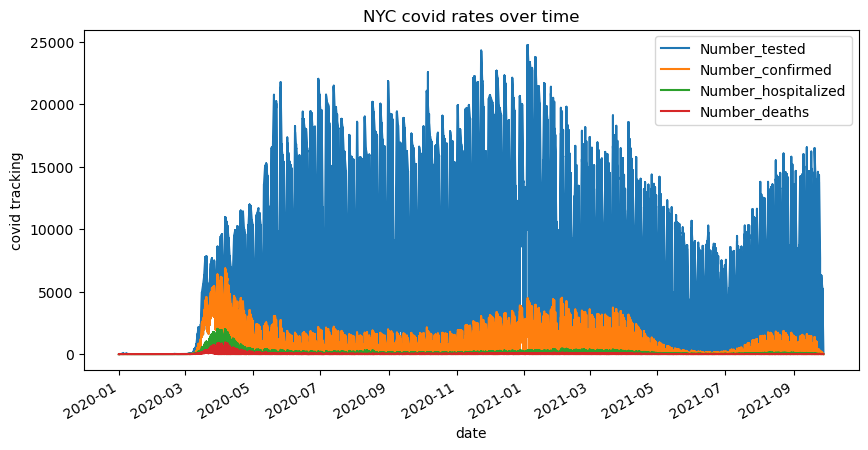

In [83]:
import matplotlib.pyplot as plt

covid_out.plot(x='Sample Date', y=['Number_tested', 'Number_confirmed', 'Number_hospitalized', 'Number_deaths'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()

In [ ]:
# we want to examine if the waste water spikes in covid before march 2020, and july 2021
# number confirmed is the value to watch correlate with waste water spikes